In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving housing_price_dataset.csv to housing_price_dataset.csv


Basic Dataset Structure: 
    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065 

Missing Values check (data cleaning):
 SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64 

Basic Statistical inferences: 
          SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      

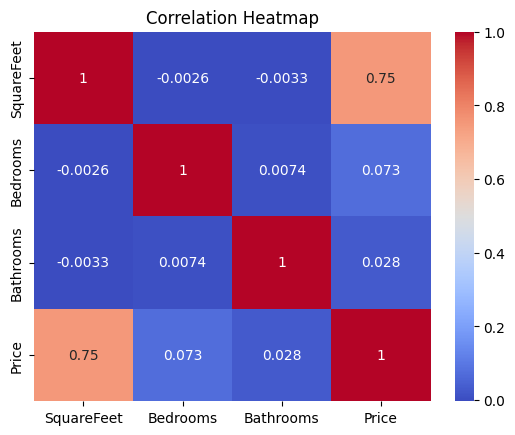


Mean Squared Error: 2437839375.9608994
R-squared: 0.57528585648486 



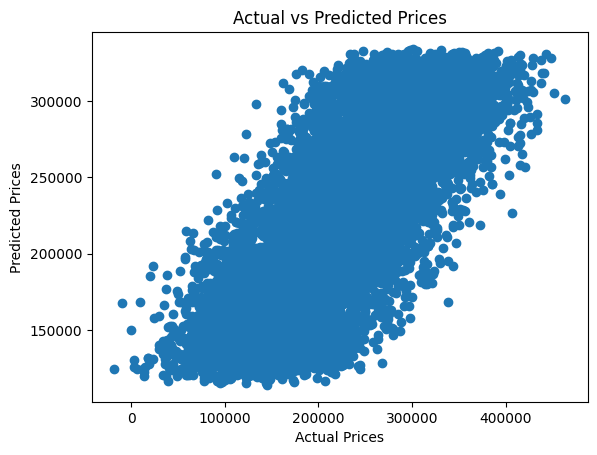

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('housing_price_dataset.csv')

print("Basic Dataset Structure: \n",df.head(),"\n")

print("Missing Values check (data cleaning):\n",df.isnull().sum(),"\n")

df = df.dropna()
print("Basic Statistical inferences: \n",df.describe(),"\n")

corr_matrix = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

X = df[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2} \n')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
